# About the Project

## Xente Fraud Detection Challenge
Accurately classify the fraudulent transactions from Xente's e-commerce platform

### Project Objective
The objective of this competition is to create a machine learning model to detect fraudulent transactions.
Fraud detection is an important application of machine learning in the financial services sector. This solution will help Xente provide improved and safer service to its customers.

### About Xente
Xente is an e-payments, e-commerce, and financial services company in Uganda offering various products and services that can be paid for using Mobile Money (Airtel Money, MTN Mobile Money), Bank Card (Visa Card, Master Card), Xente wallet and on credit (Pay Later). Some of the products consumers can buy include airtime, data bundles, pay water and electricity bills, TV subscription services, buy event tickets, movie tickets, bus tickets, and more.

### Evaluation
The error metric for this competition is the F1 score, which ranges from 0 (total failure) to 1 (perfect score). Hence, the closer your score is to 1, the better your model.
* F1 Score: A performance score that combines both precision and recall. It is a harmonic mean of these two variables.

            The formula is:
$$
F1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


* Precision: This is an indicator of the number of items correctly identified as positive out of total items identified as positive.

            Formula is given as:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$
 

* Recall / Sensitivity / True Positive Rate (TPR): This is an indicator of the number of items correctly identified as positive out of total actual positives.

            Formula is given as: 
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Where:

- **TP** = True Positive
- **FP** = False Positive
- **TN** = True Negative
- **FN** = False Negative



## Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, precision_recall_curve


from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline 
import warnings  ## to suppress warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

## Load Dataset

In [2]:
data = pd.read_csv('xente.csv')
data_var = pd.read_csv('Xente_Variable.csv')

## Data Inspection

In [3]:
#Adjust data frame display settings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None) 

In [4]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
data.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [6]:
data.shape

(95662, 16)

In [7]:
# Columns and their defintion

data_var

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transactions for processing
2,AccountId,Unique number identifying the customer on platform
3,SubscriptionId,Unique number identifying the customer subscription
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader product categories.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [9]:
#create a copy of the dataset

df = data.copy()

## Exploratory Data Analysis (EDA)

In [10]:
# checking unique values

data_columns = df.columns
ids = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'TransactionStartTime']
for col in data_columns:
    if col not in ids:
        print(df[col].unique(), '\n')
        print(df[col].value_counts(), '\n')

['UGX'] 

CurrencyCode
UGX    95662
Name: count, dtype: int64 

[256] 

CountryCode
256    95662
Name: count, dtype: int64 

['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2'] 

ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64 

['ProductId_10' 'ProductId_6' 'ProductId_1' 'ProductId_21' 'ProductId_3'
 'ProductId_15' 'ProductId_11' 'ProductId_19' 'ProductId_4' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23'] 

ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2  

### EDA on Continous Variables

In [11]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


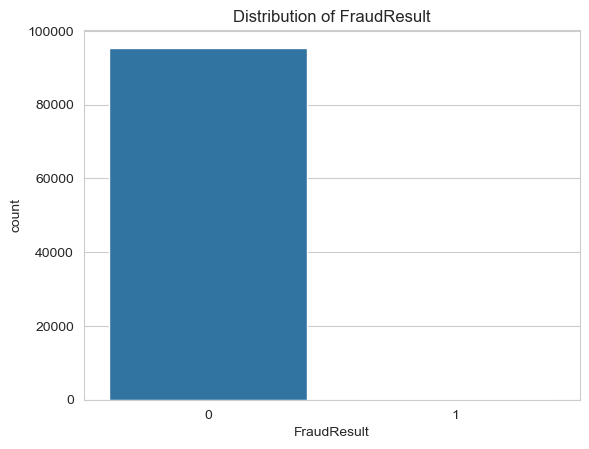

In [12]:
print(df['FraudResult'].value_counts(normalize = True))
sns.countplot(x='FraudResult', data=df)
plt.title('Distribution of FraudResult')
plt.show()

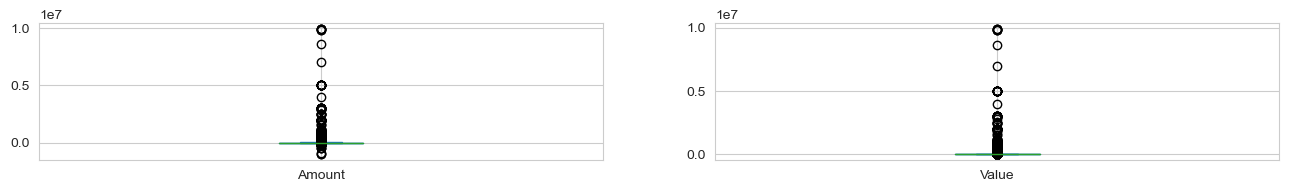

In [13]:
# Distribution
cot_columns = ['Amount', 'Value']

df[cot_columns].plot(kind='box', 
                   subplots=True, 
                   layout=(117, 2), 
                   sharex=False, 
                   figsize=(16, 250))

plt.show()

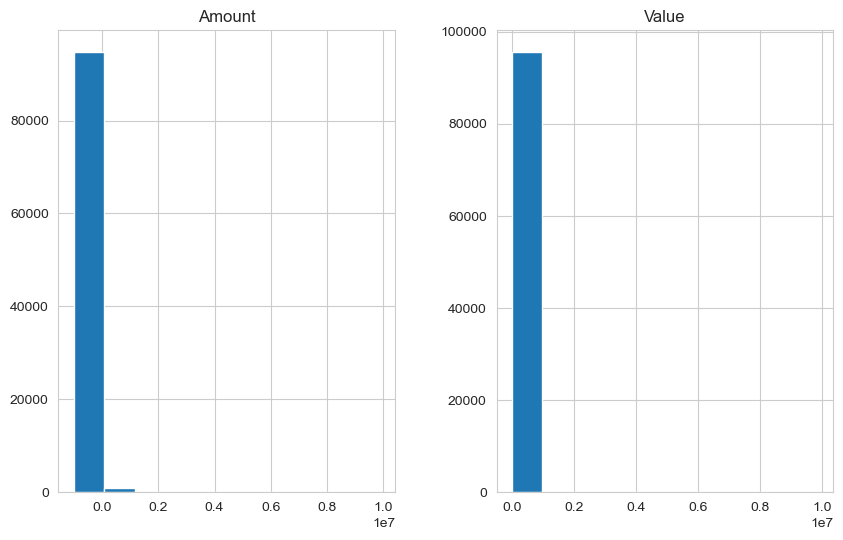

In [14]:
df[cot_columns].hist(figsize=(10,6))
plt.show()

In [15]:
print(df['FraudResult'].value_counts(normalize = True))


FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


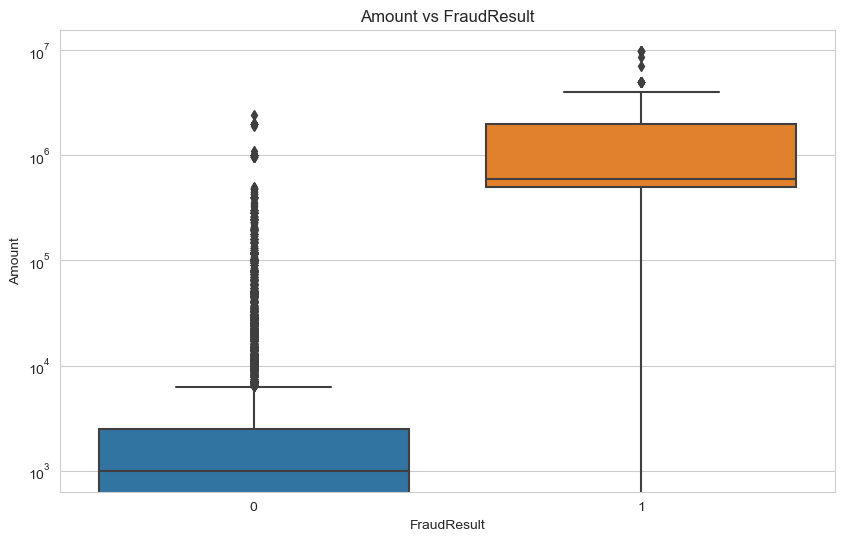

In [16]:
# Analyzing Amount vs FraudResult

plt.figure(figsize=(10, 6))
sns.boxplot(x='FraudResult', y='Amount', data=df)
plt.title('Amount vs FraudResult')
plt.yscale('log')
plt.show()

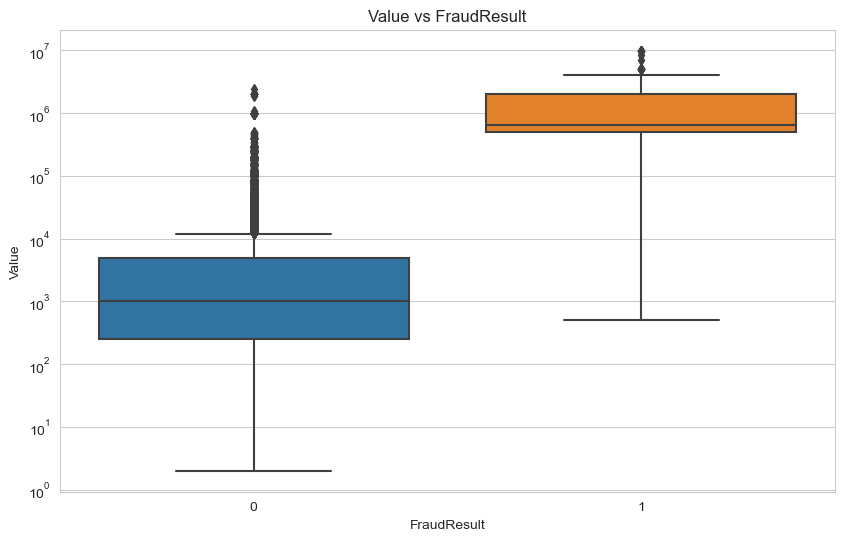

In [17]:
# Analyzing Value vs FraudResult

plt.figure(figsize=(10, 6))
sns.boxplot(x='FraudResult', y='Value', data=df)
plt.title('Value vs FraudResult')
plt.yscale('log')
plt.show()

### EDA on Categorical Variables

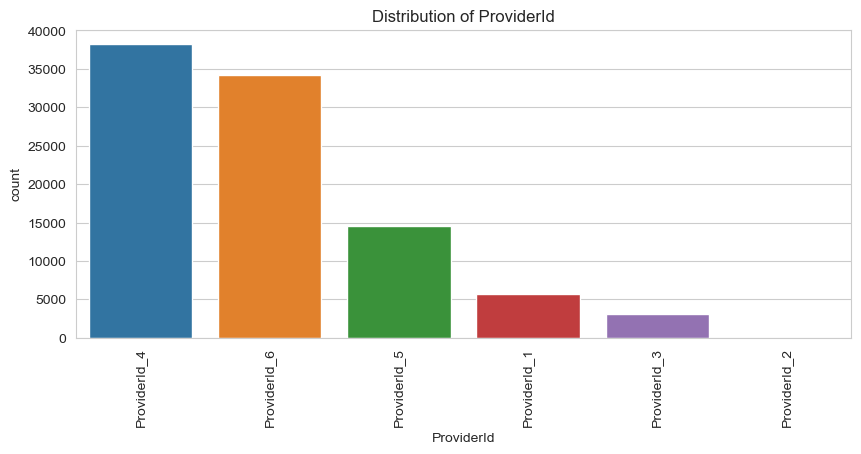

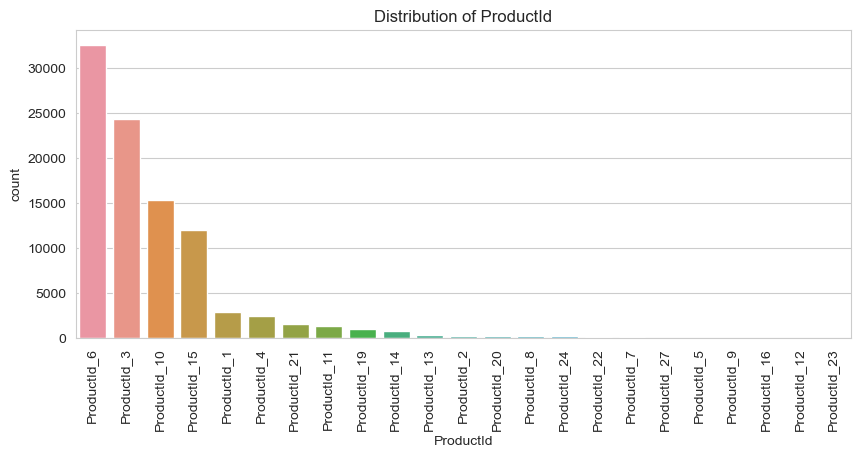

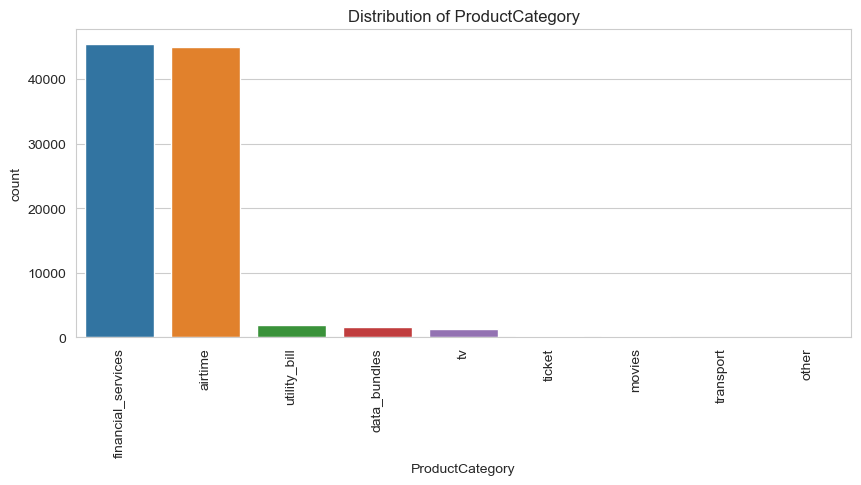

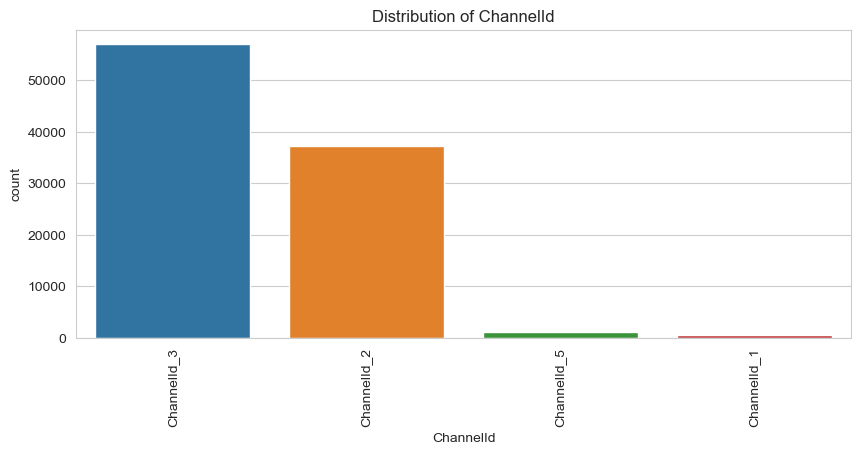

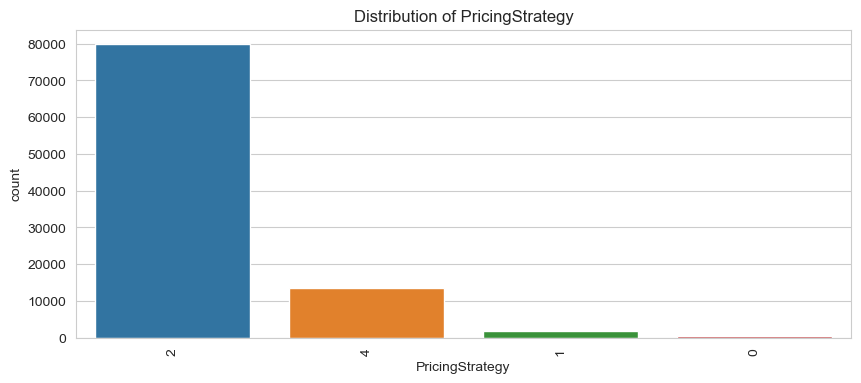

In [18]:
# Explore categorical features
categorical_columns = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy']
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

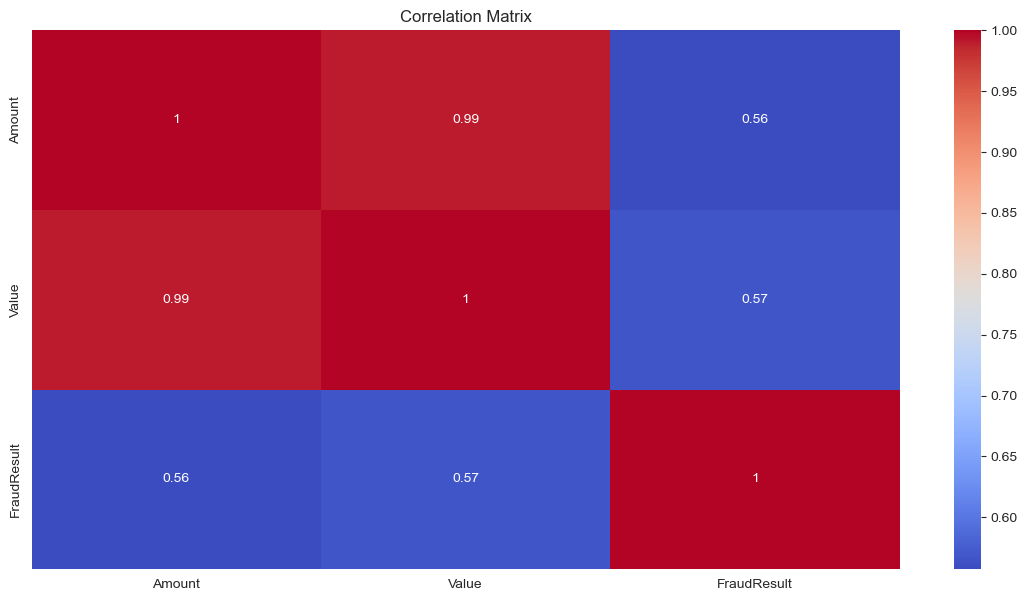

In [19]:
# Investigate correlations
# Select only numerical columns for correlation matrix
cot_df = df[['Amount', 'Value', 'FraudResult']]

correlation_matrix = cot_df.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

In [20]:
#converting date column type to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [21]:
# Extract datetime features
df['TransactionYear'] = df['TransactionStartTime'].dt.year
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.dayofweek

In [22]:
# Encoding categorical variables
categorical_columns = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy']
df = pd.get_dummies(df, columns=categorical_columns)

In [23]:
# Dropping columns that won't be used for modeling
df.drop(['CurrencyCode', 'CountryCode', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
         'CustomerId', 'TransactionStartTime', 'Amount'], axis=1, inplace=True)


In [24]:
# Define features and target variable
X = df.drop('FraudResult', axis=1)
y = df['FraudResult']


In [25]:
X.head()

,Value,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionDayOfWeek,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,1000,2018,11,15,2,3,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,20,2018,11,15,2,3,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,500,2018,11,15,2,3,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,21800,2018,11,15,3,3,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,644,2018,11,15,3,3,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


### Data Preprocessing:

In [26]:
# Apply SMOTE with a specific ratio to the undersampled training set

smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

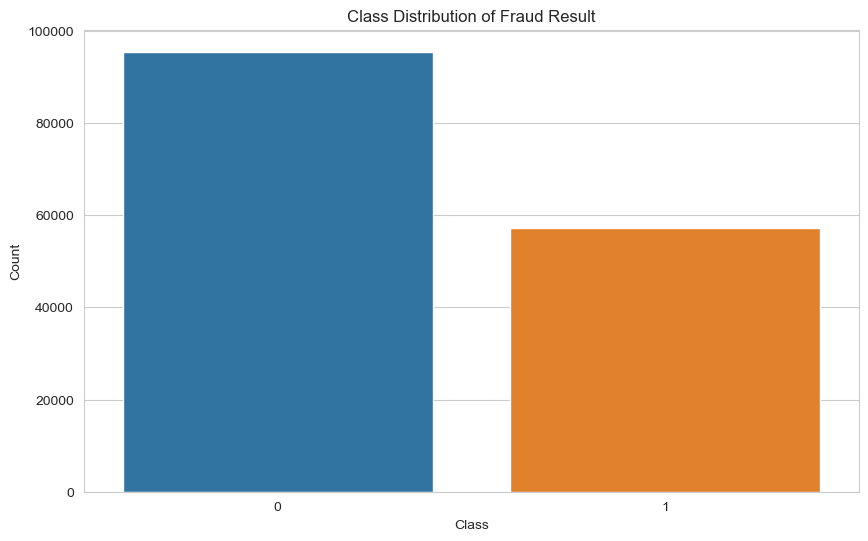

In [27]:

# Visualize the countplot to check if the classes are balanced
plt.figure(figsize=(10, 6))
sns.countplot(x=y_res)
plt.title('Class Distribution of Fraud Result')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [28]:
#Normalize features
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(X_res)

In [29]:
## Converting the scaled data (Feature) to DataFrame 

rescaled_X_df = pd.DataFrame(rescaled_X, columns=X.columns)

rescaled_X_df.head(5)

,Value,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionDayOfWeek,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,-0.396679,-1.004238,0.968355,0.004651,-2.263199,0.138482,-0.325199,-0.010856,-0.322175,-0.578504,...,-0.09189,-0.173124,-0.059452,-0.567941,0.632285,-0.083116,-0.181761,-0.132565,0.614747,-0.320277
1,-0.397337,-1.004238,0.968355,0.004651,-2.263199,0.138482,-0.325199,-0.010856,-0.322175,1.728595,...,-0.09189,-0.173124,-0.059452,1.760747,-1.581566,-0.083116,-0.181761,-0.132565,0.614747,-0.320277
2,-0.397014,-1.004238,0.968355,0.004651,-2.263199,0.138482,-0.325199,-0.010856,-0.322175,-0.578504,...,-0.09189,-0.173124,-0.059452,-0.567941,0.632285,-0.083116,-0.181761,-0.132565,0.614747,-0.320277
3,-0.382719,-1.004238,0.968355,0.004651,-2.051384,0.138482,3.075042,-0.010856,-0.322175,-0.578504,...,-0.09189,5.776197,-0.059452,-0.567941,0.632285,-0.083116,-0.181761,-0.132565,0.614747,-0.320277
4,-0.396918,-1.004238,0.968355,0.004651,-2.051384,0.138482,-0.325199,-0.010856,-0.322175,1.728595,...,-0.09189,-0.173124,-0.059452,1.760747,-1.581566,-0.083116,-0.181761,-0.132565,0.614747,-0.320277


In [30]:
X = rescaled_X

#### Data Imbalancing

## Machine Learning

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=42, stratify=y_res)


### Building Model

In [34]:


# Define the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Fit the models and make predictions
metrics = {}
prob_predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    prob_predictions[name] = y_prob
    metrics[name] = {
        "F1 Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Accuracy": accuracy_score(y_test, y_pred)
    }




# Model Performance

In [40]:
metrics_df = pd.DataFrame(metrics).T

metrics_df

,F1 Score,Precision,Recall,Accuracy
Random Forest,0.999346,0.999040,0.999651,0.999509
Logistic Regression,0.996693,0.993581,0.999825,0.997512
Support Vector Machine,0.996389,0.993149,0.999651,0.997283
Gradient Boosting,0.998562,0.997301,0.999825,0.998920
Decision Tree,0.999564,0.999476,0.999651,0.999673


**Precision**: Precision (99.9%) shows that when the model predicts a positive case, it is correct 99.9% of the time. This is important to minimize false positives.

**Recall**: Recall (99.9%) indicates that the model identifies all actual positive cases, which is crucial for ensuring that no positives are missed.

**F1 Score**: The F1 Score (99.9%) balances precision and recall, providing a single metric that considers both false positives and false negatives, showing the model’s robustness.

**Accuracy**: High accuracy (99.9%) indicates that the model performs exceptionally well overall in classifying both positive and negative cases correctly.

| Model                 | Strengths                                                                                      | Weaknesses                                                                                   |
|-----------------------|------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| Decision Tree         | - Simple to visualize and explain; resembles human decision-making.                            | - Can be biased if the dataset is imbalanced, favoring the dominant class.                   |
|                       | - Works with raw data without needing scaling or normalization.                                |                                                                                              |
|-----------------------|------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| Random Forest         | - Handles both binary and multi-class classification effectively.                              | - Requires more computational resources and memory compared to simpler models.               |
|                       | - Reduces overfitting by averaging multiple decision trees.                                    | - Interpretability can be lower compared to simpler models like decision trees.              |
|                       | - Can handle large datasets with higher dimensionality.                                        |                                                                                              |
|                       | - Provides feature importance which helps in feature selection.                                |                                                                                              |
|-----------------------|------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| Support Vector Machine| - Effective in high-dimensional spaces.                                                        | - Can be slow to train on large datasets.                                                    |
|                       | - Uses a subset of training points in the decision function, making it memory efficient.       | - Choosing the right kernel can be challenging.                                              |
|                       | - Can handle non-linear data using the kernel trick.                                           | - Less effective on noisy datasets with overlapping classes.                                 |
|                       | - Robust to overfitting, especially in high-dimensional space.                                 |                                                                                              |
|-----------------------|------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| Gradient Boosting     | - Can handle both binary and multi-class classification problems.                              | - Computationally intensive and slower to train compared to other ensemble methods.          |
|                       | - Often provides better accuracy than other models.                                            | - Requires careful tuning of hyperparameters like learning rate and number of trees.         |
|                       | - Works well with a variety of loss functions.                                                 | - Interpretability is lower compared to single decision trees.                               |
|                       | - Capable of handling missing data well.                                                       |                                                                                              |


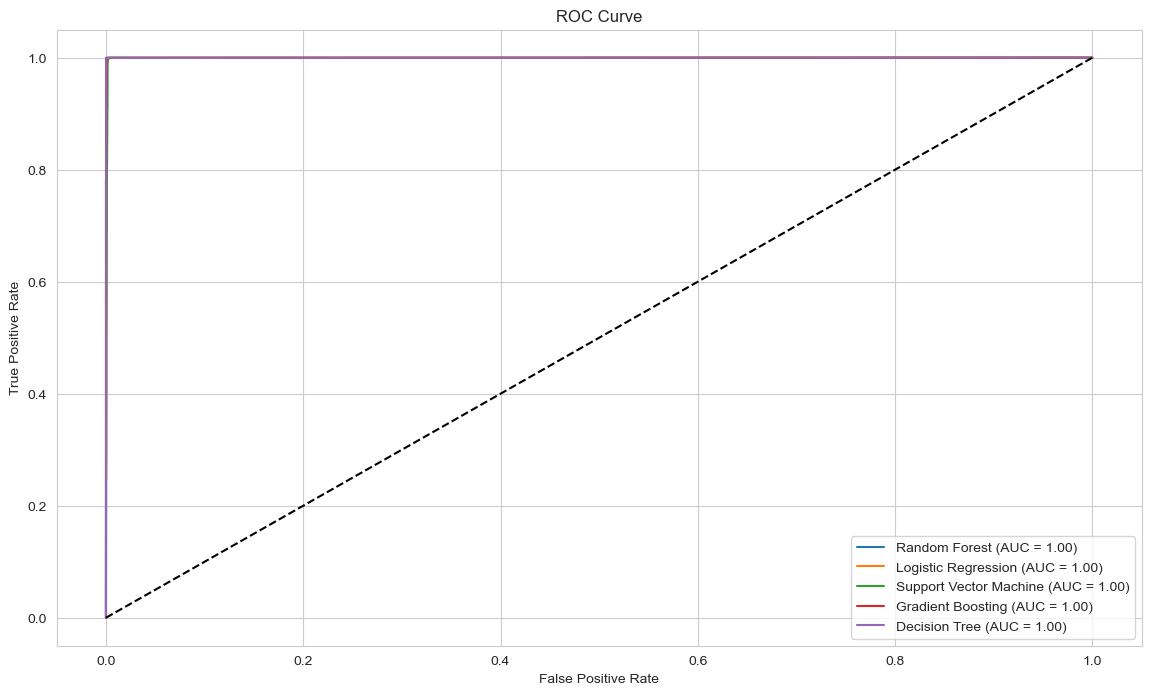

In [37]:
# Plotting ROC Curves
plt.figure(figsize=(14, 8))

for model_name, y_prob in prob_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

- The curves for all models are hugging the top left and top edges of the plot, which is indicative of near-perfect performance.

- An AUC (Area Under the Curve) of 1.00 for all models means they are achieving perfect classification. The models are correctly predicting all positive and negative cases without any errors.

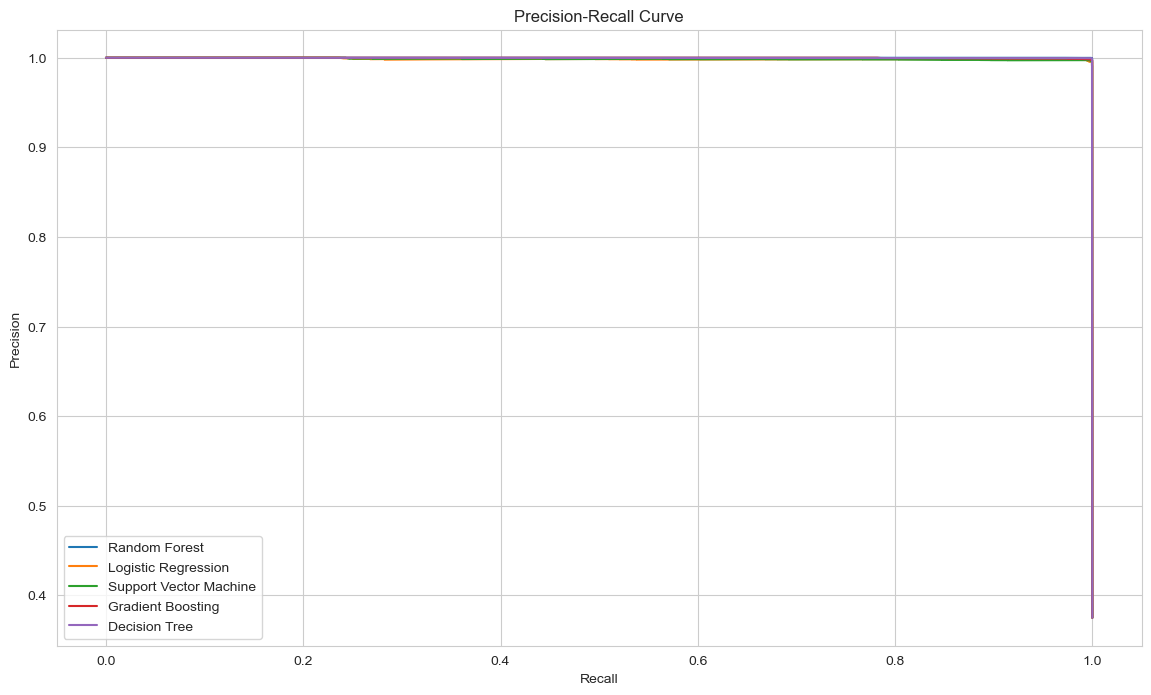

In [38]:
# Plotting Precision-Recall Curves
plt.figure(figsize=(14, 8))

for model_name, y_prob in prob_predictions.items():
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'{model_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

- The curves for all models are very close to the top right corner, indicating that they have very high precision and recall.

- This suggests that the models are excellent at correctly identifying positive cases with very few false positives.

#### Confusion Matrix

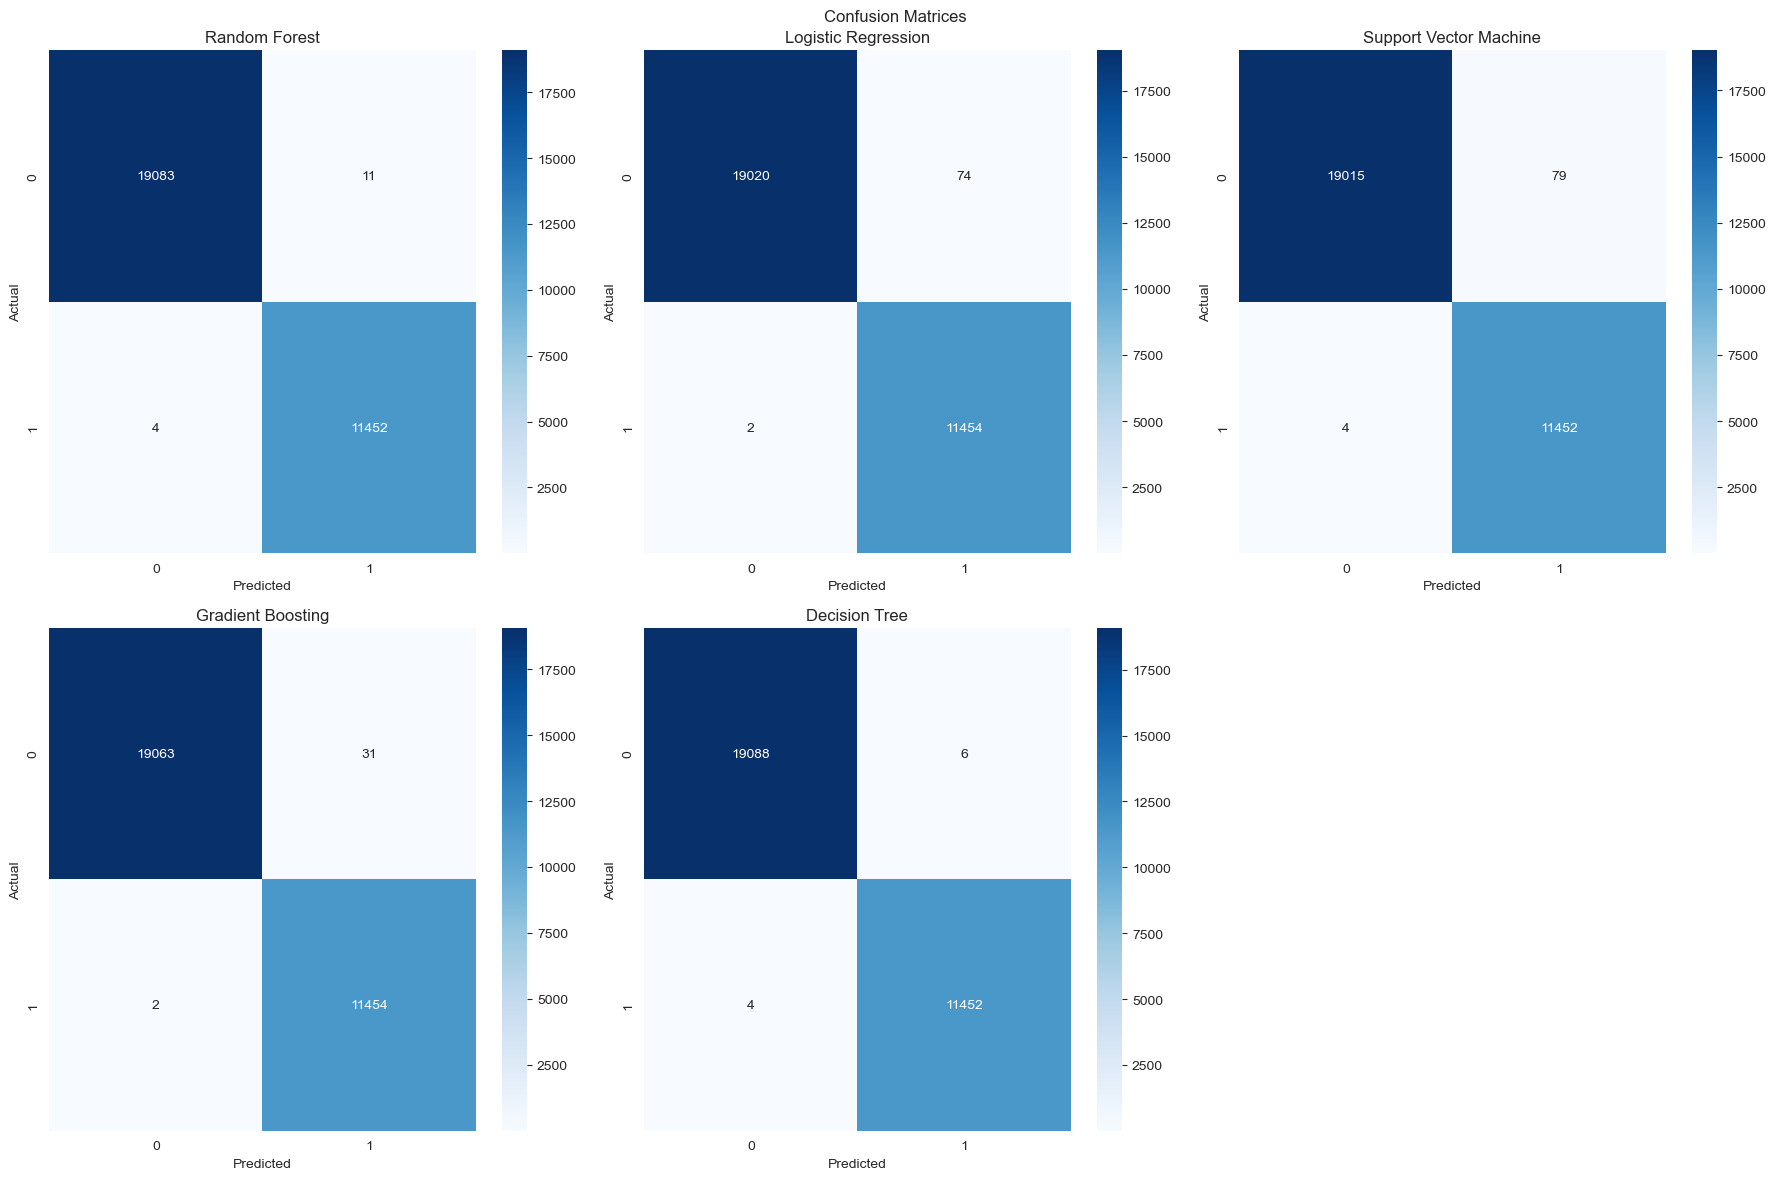

In [41]:
# Plotting Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices')

# Plot confusion matrices
for ax, (model_name, model) in zip(axes.flatten()[:len(models)], models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Remove the extra subplot
for ax in axes.flatten()[len(models):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

* True Positives (TP): Cases where the model correctly predicted fraud (fraudulent cases correctly identified).
* True Negatives (TN): Cases where the model correctly predicted no fraud (non-fraudulent cases correctly identified).
* False Positives (FP): Cases where the model incorrectly predicted fraud (non-fraudulent cases incorrectly identified as fraudulent).
* False Negatives (FN): Cases where the model incorrectly predicted no fraud (fraudulent cases incorrectly identified as non-fraudulent).

#### Decision tree model

In [197]:
# Predictions for Random Forest model
y_pred_dt = models["Decision Tree"].predict(X_test)

In [198]:
yPredict = pd.DataFrame( { "actual": y_test, 
"predicted": y_pred_dt } ) 
yPredict.head()

,actual,predicted
101543,1,1
101530,1,1
147479,1,1
149271,1,1
118108,1,1


In [199]:
# Compute the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)


In [201]:

# Extracting TP, TN, FP, FN
TN, FP, FN, TP = cm_rf.ravel()

print(f'True Positives (TP): {TP}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')

True Positives (TP): 11452
True Negatives (TN): 19088
False Positives (FP): 6
False Negatives (FN): 4


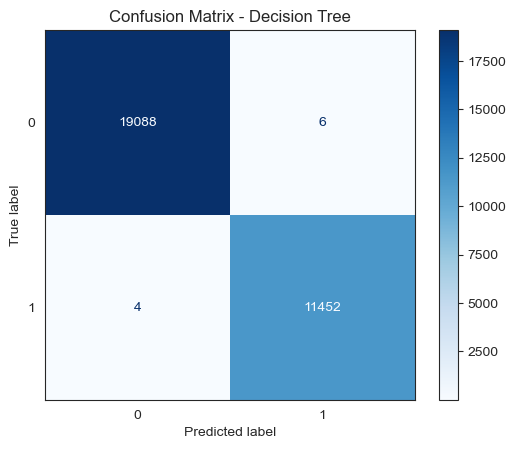

In [202]:
sns.set_style("white")

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=models["Decision Tree"].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()